In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [2]:
ms = pd.read_csv('../Datasets/rainfall in india 1901-2015.csv')
ms.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


Modifying the Dataset

In [3]:
from datetime import datetime

data = pd.read_csv('../Datasets/1901-2015/TELANGANA.csv')
data = data.drop(columns=['SUBDIVISION','ANNUAL', 'Jan-Feb','Mar-May','Jun-Sep','Oct-Dec'])

melted_df = pd.melt(data, id_vars=['YEAR'], var_name='MONTH', value_name='RAINFALL')

month_mapping = {
    "JAN": "01", "FEB": "02", "MAR": "03", "APR": "04", "MAY": "05", "JUN": "06",
    "JUL": "07", "AUG": "08", "SEP": "09", "OCT": "10", "NOV": "11", "DEC": "12"
}

melted_df["MONTH"] = melted_df["MONTH"].map(month_mapping)
melted_df["DATE"] = "01-" + melted_df["MONTH"] + "-" + melted_df["YEAR"].astype(str)

final_df = melted_df[['DATE', 'RAINFALL']]
final_df.set_index('DATE', inplace=True)
final_df.index = pd.to_datetime(final_df.index, format='%d-%m-%Y')
final_df.sort_index(inplace=True)
print(len(final_df))
train_data = final_df[:1272]
print(len(train_data))

test_data = final_df[1272:]
print(len(test_data))
print(test_data, train_data)

1380
1272
108
            RAINFALL
DATE                
2007-01-01       0.0
2007-02-01       0.0
2007-03-01       0.1
2007-04-01       0.1
2007-05-01       9.2
...              ...
2015-08-01     160.5
2015-09-01     158.3
2015-10-01      15.6
2015-11-01       0.3
2015-12-01       1.7

[108 rows x 1 columns]             RAINFALL
DATE                
1901-01-01       6.9
1901-02-01      41.8
1901-03-01       7.8
1901-04-01      45.2
1901-05-01      22.0
...              ...
2006-08-01     308.2
2006-09-01     280.2
2006-10-01      28.1
2006-11-01      34.7
2006-12-01       0.0

[1272 rows x 1 columns]


C:\Users\Manasa Swamireddy\AppData\Local\Temp\ipykernel_17948\3917673355.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.sort_index(inplace=True)


<Axes: xlabel='DATE'>

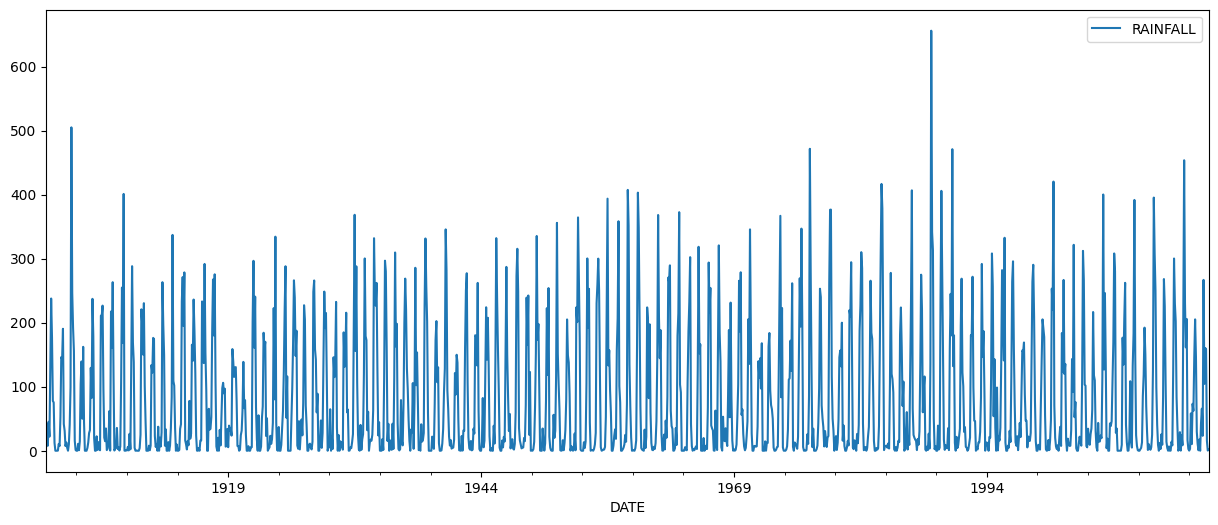

In [4]:
import matplotlib.pyplot as plt

final_df.plot(figsize=(15, 6))

In [5]:
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.fit_transform(test_data)

print('Shape of train data: ', scaled_train_data.shape)
print('Shape of test data: ', scaled_test_data.shape)

Shape of train data:  (1272, 1)
Shape of test data:  (108, 1)


Converting timeseries data into input and labels

In [6]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []

    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    
    return np.array(dataX), np.array(dataY)

In [7]:
look_back = 6
X_train, y_train = create_dataset(scaled_train_data, look_back)
X_test, y_test = create_dataset(scaled_test_data, look_back)

In [8]:
print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (1265, 6)
Shape of y_train:  (1265,)
Shape of X_test:  (101, 6)
Shape of y_test:  (101,)


In [9]:
#Reshaping the data

X_train = np.reshape(X_train,(X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0], 1, X_test.shape[1]))

print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (1265, 1, 6)
Shape of y_train:  (1265,)
Shape of X_test:  (101, 1, 6)
Shape of y_test:  (101,)


In [10]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from keras import regularizers

# Create the LSTM model
model = Sequential()

input_shape = (X_train.shape[1], X_train.shape[2])

model.add(LSTM(units=64,input_shape=input_shape, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))

# Add a dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['accuracy'])
model.summary()

c:\Users\Manasa Swamireddy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 64)          │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,625 (119.63 KB)

 Trainable params: 30,625 (119.63 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
import h5py

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best.keras', monitor='loss',mode='min', save_best_only=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    verbose=1,
    callbacks=[model_checkpoint]
)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1137 - loss: 0.0375
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1348 - loss: 0.0325
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1062 - loss: 0.0272
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1112 - loss: 0.0235
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1100 - loss: 0.0203
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1288 - loss: 0.0183
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1203 - loss: 0.0167
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1171 - loss: 0.0197
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1239 - loss: 0.0156
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1154 - loss: 0.0136
Epoch 11/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1421 - loss: 0.0141
Epoch 12/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accura

In [12]:
best_model = tf.keras.models.load_model('best.keras')

# Make predictions
train_predict = best_model.predict(X_train)
test_predict = best_model.predict(X_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


In [13]:
train_predict.shape

(1265, 1)

In [14]:
train_predict = train_predict.reshape(train_predict.shape[0], train_predict.shape[1])
trainPredict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

test_predict = test_predict.reshape(test_predict.shape[0], test_predict.shape[1])
testPredict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])


In [15]:
# #Inverse transforming the data

# train_predict = scaler.inverse_transform(train_predict)

In [16]:
import math
from sklearn.metrics import mean_squared_error
#Calculating rmse for train and test predictions
trainScore = math.sqrt(mean_squared_error(y_train[-1], train_predict[:,0]))
print('Train RMSE: %.2f' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[-1], test_predict[:,0]))
print('Test RMSE: %.2f' % (testScore))

Train RMSE: 88.72
Test RMSE: 132.01


In [17]:
dates = pd.date_range(start='1901-01-01', freq='MS',periods=y_train.shape[1])

len(dates)

1265

In [18]:
trainActual = pd.DataFrame({'Rainfall' : y_train[0]})
trainActual.index = dates

trainPredicted = pd.DataFrame({'Rainfall' : trainPredict[:,0]})
trainPredicted.index = dates

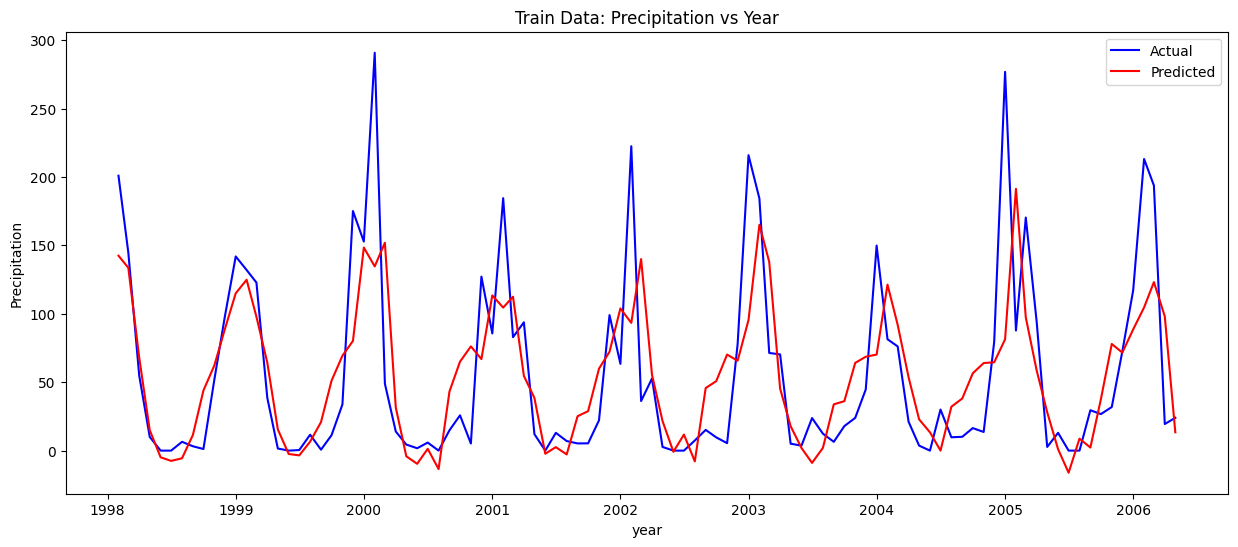

In [19]:
plt.figure(figsize=(15, 6))
plt.plot(trainActual[-100:], label='Actual', color='blue')
plt.plot(trainPredicted[-100:], label='Predicted', color='red')
plt.title('Train Data: Precipitation vs Year')
plt.xlabel('year')
plt.ylabel('Precipitation')
plt.legend()

In [20]:
test_dates = pd.date_range(start='2007-01-01', freq='MS',periods=y_test.shape[1])

In [21]:
testActual = pd.DataFrame({'Rainfall' : y_test[0]})
testActual.index = test_dates

testPredicted = pd.DataFrame({'Rainfall' : testPredict[:,0]})
testPredicted.index = test_dates

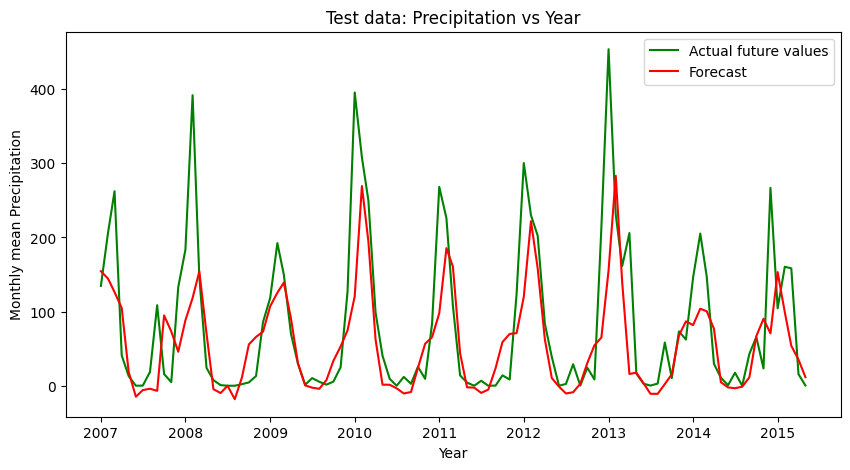

In [22]:
plt.figure(figsize=(10,5))
plt.plot(testActual, color='green', label='Actual future values')
plt.plot(testPredicted, color='red', label='Forecast')
plt.title('Test data: Precipitation vs Year')
plt.xlabel('Year')
plt.ylabel('Monthly mean Precipitation')
plt.legend(loc='best')

Loss: 0.011190513148903847
Accuracy: 0.1201581060886383
Train RMSE: 88.72
Test RMSE: 132.01


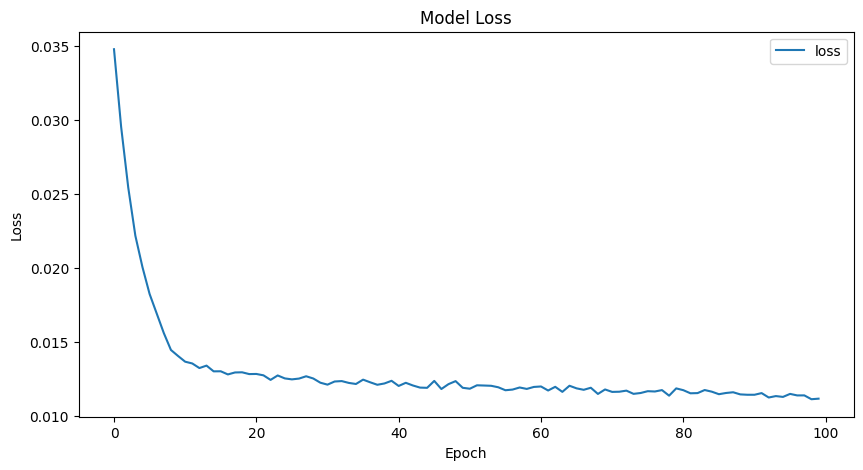

In [23]:
#Evaluation of the model
#Loss and rmse values
history.history.keys()

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# printing the loss and accuracy of the best model stored in best.keras


#Best Loss value of the model
loss = history.history['loss']
print('Loss:', loss[-1])
#Prining accuracy
accuracy = history.history['accuracy']
print('Accuracy:', accuracy[-1])

#RMSE
print('Train RMSE: %.2f' % (trainScore))
print('Test RMSE: %.2f' % (testScore))


In [24]:
#print training loss and test loss
print('Training Loss:', history.history['loss'][-1])
print('Test Loss:', history.history['val_loss'][-1])

Training Loss: 0.011190513148903847


KeyError: 'val_loss'